AVANCE 1


AVANCE 1


In [141]:
import numpy as np
import pandas as pd

In [142]:
df = pd.read_csv('data_latinoamerica.csv')

In [143]:
df.shape

(12216057, 50)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [145]:

chunksize = 100000 # Número de filas por fragmento
paises = ['Colombia', 'Argentina','Chile','Mexico', 'Peru', 'Brazil']
location_keys = ['CO', 'AR','CL', 'MX', 'PE','BR']
fecha_inicio = '2021-01-01'
resultados = []
for chunk in pd.read_csv('data_latinoamerica.csv', chunksize=chunksize, parse_dates=['date']):
    #Filtrar por países y fecha 
   filtrado = chunk[(chunk['country_name'].isin(paises)) & (chunk['date'] >= fecha_inicio) & (chunk['location_key'].isin(location_keys))]
   resultados.append (filtrado)
# Unir todos los fragmentos filtrados en un solo DataFrame
df_filtrado = pd .concat(resultados, ignore_index=True)
print(df_filtrado)
df_filtrado.shape

     location_key       date country_code country_name  new_confirmed  \
0              AR 2021-01-01           AR    Argentina           2685   
1              AR 2021-01-02           AR    Argentina           7767   
2              AR 2021-01-03           AR    Argentina           4934   
3              AR 2021-01-04           AR    Argentina          13953   
4              AR 2021-01-05           AR    Argentina          14085   
...           ...        ...          ...          ...            ...   
3745           PE 2022-09-13           PE         Peru           1150   
3746           PE 2022-09-14           PE         Peru            NaN   
3747           PE 2022-09-15           PE         Peru            NaN   
3748           PE 2022-09-16           PE         Peru            NaN   
3749           PE 2022-09-17           PE         Peru            NaN   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0              140               1662867                46

(3750, 50)

In [146]:
#chequeo de nulos a nivel pais
valores_nulos_por_pais = df_filtrado.groupby('country_name').apply(lambda x: x.isnull().sum())
valores_nulos_por_pais

C:\Users\drael\AppData\Local\Temp\ipykernel_114368\487210441.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valores_nulos_por_pais = df_filtrado.groupby('country_name').apply(lambda x: x.isnull().sum())


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,4,4,4,4,4,0,...,0,0,0,0,0,0,0,0,625,625
Brazil,0,0,0,0,2,2,2,2,18,0,...,0,0,0,0,0,0,0,0,3,3
Chile,0,0,0,0,4,4,4,4,14,0,...,0,0,0,0,0,0,0,0,4,625
Colombia,0,0,0,0,4,4,4,4,291,0,...,0,0,0,0,0,0,0,0,237,237
Mexico,0,0,0,0,3,3,3,3,218,0,...,0,0,0,0,0,0,0,0,625,625
Peru,0,0,0,0,4,4,4,4,44,0,...,0,0,0,0,0,0,0,0,625,625


In [147]:
valores_nulos

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [148]:
# variables para llenar con cero
cols_casos = ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased", 'cumulative_vaccine_doses_administered']
cols_casos.extend(["new_recovered", "cumulative_recovered"])
df_filtrado[cols_casos] = df_filtrado[cols_casos].fillna(0)


In [149]:
cols = (["new_recovered", "cumulative_recovered"])

In [150]:
df_filtrado[cols] = df_filtrado[cols].fillna(0)

In [151]:
# varialos por media
cols_temp = ["average_temperature_celsius", "minimum_temperature_celsius", "maximum_temperature_celsius", "rainfall_mm", "relative_humidity"]

for col in cols_temp:
    df_filtrado[col] = (
        df_filtrado.groupby("country_name")[col]
        .transform(lambda x: x.fillna(x.mean()))  # primero media por país
        .fillna(df_filtrado[col].mean())          # si aún queda nulo, usar media global
    )


In [152]:
print(df_filtrado.isnull().sum())

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [153]:
print(np.shape(df_filtrado))

(3750, 50)


In [154]:
df_filtrado.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-01,AR,Argentina,2685,140,1662867,46522,18849,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
1,AR,2021-01-02,AR,Argentina,7767,166,1670634,46688,20334,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
2,AR,2021-01-03,AR,Argentina,4934,157,1675568,46845,20529,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
3,AR,2021-01-04,AR,Argentina,13953,157,1689521,47002,25164,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
4,AR,2021-01-05,AR,Argentina,14085,160,1703606,47162,29852,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
5,AR,2021-01-06,AR,Argentina,14496,131,1718102,47293,34162,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
6,AR,2021-01-07,AR,Argentina,13722,160,1731824,47453,42092,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
7,AR,2021-01-08,AR,Argentina,13932,162,1745756,47615,54090,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
8,AR,2021-01-09,AR,Argentina,9959,158,1755715,47773,58552,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
9,AR,2021-01-10,AR,Argentina,5174,165,1760889,47938,59043,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0


In [155]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3750 non-null   object        
 1   date                                   3750 non-null   datetime64[ns]
 2   country_code                           3750 non-null   object        
 3   country_name                           3750 non-null   object        
 4   new_confirmed                          3750 non-null   float64       
 5   new_deceased                           3750 non-null   float64       
 6   cumulative_confirmed                   3750 non-null   float64       
 7   cumulative_deceased                    3750 non-null   float64       
 8   cumulative_vaccine_doses_administered  3750 non-null   float64       
 9   population                             3750 non-null   float64 

In [156]:
df_filtrado.describe()


,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750,...,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750
mean,2021-11-08 23:59:59.999999744,13847,276,6739331,191894,65340029,77721474,37870352,39271616,12554976,...,14438882,2636580,59502,77,154,81,37,15,8264,3890356
min,2021-01-01 00:00:00,-573,0,0,0,0,17574003,8972014,8601989,2341903,...,6723516,709418,12027,75,108,59,25,12,-31119,0
25%,2021-06-06 00:00:00,1511,25,2114256,58764,2550688,29381884,14450757,14931127,3599141,...,10554712,1090598,16425,76,146,78,27,13,0,0
50%,2021-11-09 00:00:00,5102,98,3616940,139478,32384815,47910798,22254165,23245825,8316128,...,12918324,1543881,45582,77,149,82,33,16,0,0
75%,2022-04-14 00:00:00,14802,312,6198848,214810,74748503,110991953,54855231,57481307,24948670,...,21671908,2690269,102418,77,184,91,37,16,1834,2134504
max,2022-09-17 00:00:00,298408,11447,34568833,685203,347868481,212559409,104435783,108123626,27807886,...,21846507,8241430,134981,80,189,96,64,17,282957,33706231
std,NaN,24212,507,7989330,182992,92439789,67137743,33184928,34484063,10080740,...,5710076,2584740,45125,2,27,12,13,2,23038,8412827


In [157]:
pd.options.display.float_format = '{:.0f}'.format

In [158]:
df_filtrado.describe()

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750,...,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750
mean,2021-11-08 23:59:59.999999744,13847,276,6739331,191894,65340029,77721474,37870352,39271616,12554976,...,14438882,2636580,59502,77,154,81,37,15,8264,3890356
min,2021-01-01 00:00:00,-573,0,0,0,0,17574003,8972014,8601989,2341903,...,6723516,709418,12027,75,108,59,25,12,-31119,0
25%,2021-06-06 00:00:00,1511,25,2114256,58764,2550688,29381884,14450757,14931127,3599141,...,10554712,1090598,16425,76,146,78,27,13,0,0
50%,2021-11-09 00:00:00,5102,98,3616940,139478,32384815,47910798,22254165,23245825,8316128,...,12918324,1543881,45582,77,149,82,33,16,0,0
75%,2022-04-14 00:00:00,14802,312,6198848,214810,74748503,110991953,54855231,57481307,24948670,...,21671908,2690269,102418,77,184,91,37,16,1834,2134504
max,2022-09-17 00:00:00,298408,11447,34568833,685203,347868481,212559409,104435783,108123626,27807886,...,21846507,8241430,134981,80,189,96,64,17,282957,33706231
std,NaN,24212,507,7989330,182992,92439789,67137743,33184928,34484063,10080740,...,5710076,2584740,45125,2,27,12,13,2,23038,8412827


In [159]:
#descubrimos valore negativos en las columnas 'new_confirmed' y 'new_recoverd'
df_filtrado[['new_confirmed', 'new_recovered']] = df_filtrado[['new_confirmed', 'new_recovered']].abs()

In [160]:
df_filtrado.describe()

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750,...,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750
mean,2021-11-08 23:59:59.999999744,13847,276,6739331,191894,65340029,77721474,37870352,39271616,12554976,...,14438882,2636580,59502,77,154,81,37,15,8349,3890356
min,2021-01-01 00:00:00,0,0,0,0,0,17574003,8972014,8601989,2341903,...,6723516,709418,12027,75,108,59,25,12,0,0
25%,2021-06-06 00:00:00,1511,25,2114256,58764,2550688,29381884,14450757,14931127,3599141,...,10554712,1090598,16425,76,146,78,27,13,0,0
50%,2021-11-09 00:00:00,5102,98,3616940,139478,32384815,47910798,22254165,23245825,8316128,...,12918324,1543881,45582,77,149,82,33,16,0,0
75%,2022-04-14 00:00:00,14802,312,6198848,214810,74748503,110991953,54855231,57481307,24948670,...,21671908,2690269,102418,77,184,91,37,16,1915,2134504
max,2022-09-17 00:00:00,298408,11447,34568833,685203,347868481,212559409,104435783,108123626,27807886,...,21846507,8241430,134981,80,189,96,64,17,282957,33706231
std,NaN,24212,507,7989330,182992,92439789,67137743,33184928,34484063,10080740,...,5710076,2584740,45125,2,27,12,13,2,23007,8412827


In [161]:
df_filtrado.to_csv('DatosFinalesFiltrados.csv', index=False)

In [162]:
pd.read_csv('DatosFinalesFiltrados.csv')

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-01,AR,Argentina,2685,140,1662867,46522,18849,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
1,AR,2021-01-02,AR,Argentina,7767,166,1670634,46688,20334,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
2,AR,2021-01-03,AR,Argentina,4934,157,1675568,46845,20529,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
3,AR,2021-01-04,AR,Argentina,13953,157,1689521,47002,25164,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
4,AR,2021-01-05,AR,Argentina,14085,160,1703606,47162,29852,44938712,...,15057273,2690269,55032,77,147,79,27,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,PE,2022-09-13,PE,Peru,1150,22,4127612,216173,0,29381884,...,10554712,1256339,16425,77,146,85,64,13,0,0
3746,PE,2022-09-14,PE,Peru,0,0,0,0,0,29381884,...,10554712,1256339,16425,77,146,85,64,13,0,0
3747,PE,2022-09-15,PE,Peru,0,0,0,0,0,29381884,...,10554712,1256339,16425,77,146,85,64,13,0,0
3748,PE,2022-09-16,PE,Peru,0,0,0,0,0,29381884,...,10554712,1256339,16425,77,146,85,64,13,0,0


In [163]:
#iteramos sobre cada columna del dataframe
for columna in df_filtrado:
    print(columna) #imprimimos el nombre de la columna

    #imprimimos estadistica descriptiva en cada columna
    print(df_filtrado[columna].describe())
    print("********************************")

 # 1-las metricas nos permiten identificar el rango y la distribucion de los datos, detectar valores atipicos y comparar la mediana con los percentiles para detectar sesgos en la distribucion
 # 2-no se muestran todas las variables en todas las coulumnas ya que solo se muestran de forma completa en las columnas numericas
 # 3-la razon de que no se muestren es el tipo de dato, y por eso es importante que el tipo de dato este de manera correcta ya que puede afectar a la interpretacion de la columna sacando conclusiones incorrectas.

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
********************************
date
count                             3750
mean     2021-11-08 23:59:59.999999744
min                2021-01-01 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-09 00:00:00
75%                2022-04-14 00:00:00
max                2022-09-17 00:00:00
Name: date, dtype: object
********************************
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
********************************
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
********************************
new_confirmed
count     3750
mean     13847
std      24212
min          0
25%       1511
50%       5102
75%      14802
max     298408
Name: new_confirmed, dtype: float64
********************************
new_deceased
count  

In [164]:
#usamos la funcion med_var_rango

def med_var_rango(serie):
    mediana = serie.median()
    varianza = serie.var()
    rango = serie.max() - serie.min()
    return pd.Series({"Mediana": mediana, "Varianza": varianza, "Rango": rango})



In [165]:
#definimos las columnas a analizar 
cols_epi = ["new_confirmed", "new_deceased", "cumulative_confirmed",
            "cumulative_deceased", "cumulative_vaccine_doses_administered"]

cols_clima = ["average_temperature_celsius", "minimum_temperature_celsius",
            "maximum_temperature_celsius", "rainfall_mm", "relative_humidity"]

cols_medicas = [ "nurses_per_1000", "physicians_per_1000",
                "diabetes_prevalence", "smoking_prevalence"]

cols_finales = [c for c in (cols_epi + cols_clima + cols_medicas) if c in df.columns]


In [166]:
# Agrupamos por país y aplicamos la función en cada columna seleccionada
resumen_paises = df_filtrado.groupby("country_name")[cols_finales].apply(lambda g: g.apply(med_var_rango)).reset_index()


In [167]:
print(resumen_paises.head(10))
# Mediana: representa el valor central, nivel típico de casos sin influencia de extremos.
# Varianza: mide cuánto fluctúan los datos alrededor de la media.
# Rango: muestra la diferencia entre el valor máximo y mínimo.
# Alta varianza mas rango nos da datos muy dispersos, poco consistentes.
# Baja varianza mas rango nos da datos más estables y consistentes.


  country_name   level_1  new_confirmed  new_deceased  cumulative_confirmed  \
0    Argentina   Mediana           5104            58               5317595   
1    Argentina  Varianza      553722548         27630         7675482339200   
2    Argentina     Rango         174174           656               9697763   
3       Brazil   Mediana          32321           389              21880439   
4       Brazil  Varianza     1567527337        755596        62466013075257   
5       Brazil     Rango         298408          4249              34568833   
6        Chile   Mediana           4201            32               1703826   
7        Chile  Varianza       46311209        210276         1460571366174   
8        Chile     Rango          38446         11447               4568495   
9     Colombia   Mediana           2443            91               5021617   

   cumulative_deceased  cumulative_vaccine_doses_administered  \
0               116703                               27042989   


AVANCE 2 


In [ ]:
#importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
print(np.shape(df_filtrado))

(3750, 50)


In [202]:
#analisis estadistico del dataset
for columna in df_filtrado:
    print(columna)
    print(df_filtrado[columna].describe())
    print('*************************************************')


location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
*************************************************
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
*************************************************
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
*************************************************
new_confirmed
count     3750
mean     13847
std      24212
min          0
25%       1511
50%       5102
75%      14802
max     298408
Name: new_confirmed, dtype: float64
*************************************************
new_deceased
count    3750
mean      276
std       507
min         0
25%        25
50%        98
75%       312
max     11447
Name: new_deceased, dtype: float64
*************************************************
cumulative_confirmed
count       3750
mean     6739331
std      7989330
min    

MATRIZ DE CORRELACION

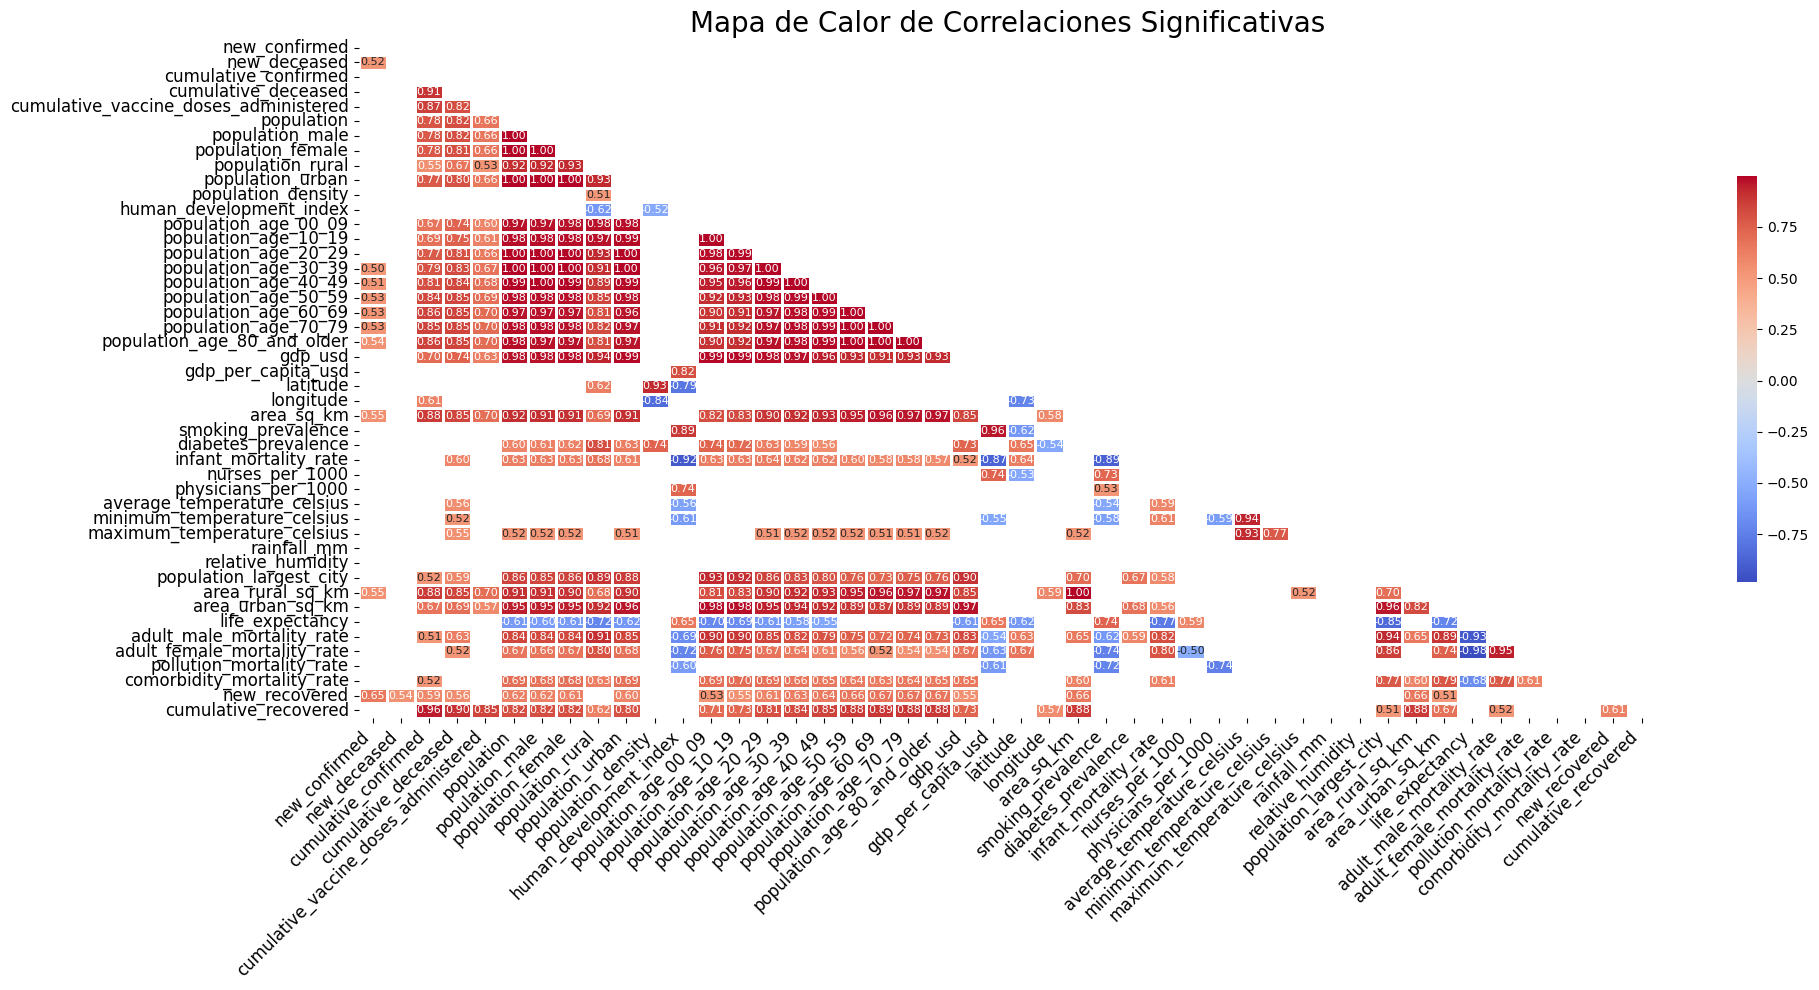

In [206]:
#seleccionamos las columnas numericas
numeric_df_filtrado = df_filtrado.select_dtypes(include=[np.number])

# filtramos solo correlaciones significativas (>0.5 o <-0.5)
corr_matrix = numeric_df_filtrado.corr()
corr_significant = corr_matrix[(corr_matrix.abs() > 0.5)]

# Creamos máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_significant, dtype=bool))

plt.figure(figsize=(20,10))

# Heatmap
sns.heatmap(corr_significant, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=1, linecolor='white', cbar_kws={"shrink": 0.6}, annot_kws={"size":8})

plt.title("Mapa de Calor de Correlaciones Significativas", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


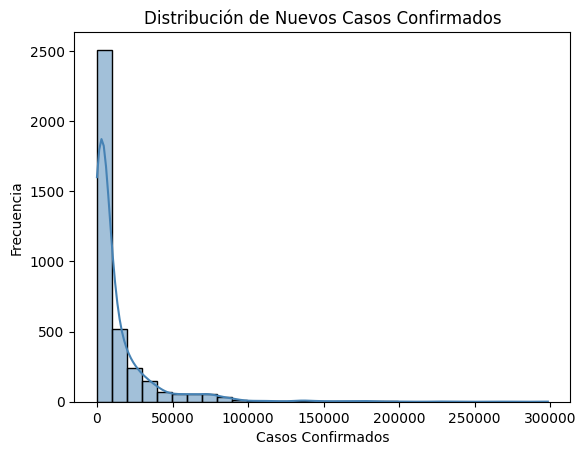

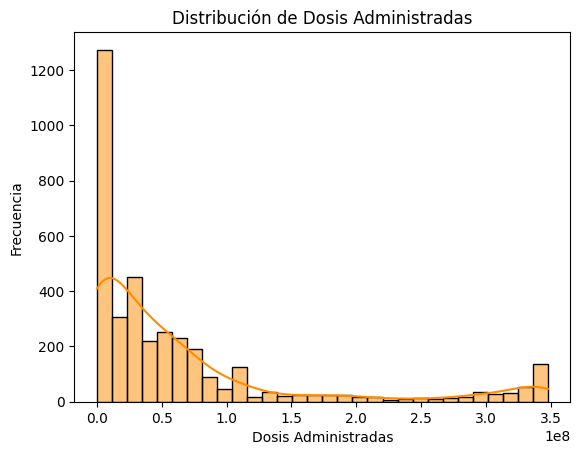

In [208]:
# Histograma + densidad: nuevos casos confirmados
sns.histplot(df_filtrado['new_confirmed'], kde=True, color='steelblue', bins=30)
plt.title("Distribución de Nuevos Casos Confirmados")
plt.xlabel("Casos Confirmados")
plt.ylabel("Frecuencia")
plt.show()

# Histograma + densidad: dosis administradas
sns.histplot(df_filtrado['cumulative_vaccine_doses_administered'], kde=True, color='darkorange', bins=30)
plt.title("Distribución de Dosis Administradas")
plt.xlabel("Dosis Administradas")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\1438323582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='new_confirmed', data=df_filtrado, palette='viridis')


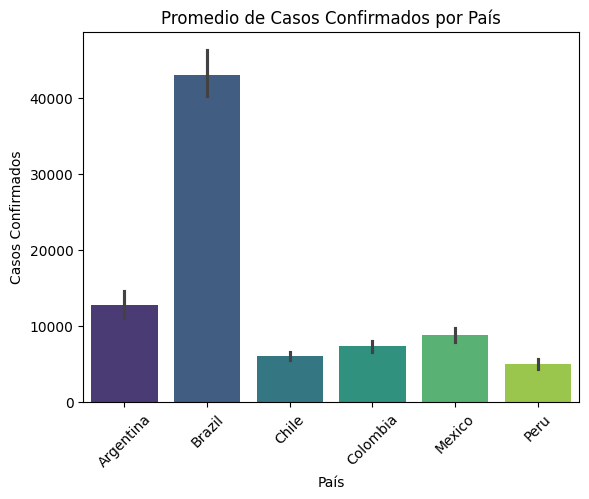

C:\Users\drael\AppData\Local\Temp\ipykernel_114368\1438323582.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_filtrado, palette='magma')


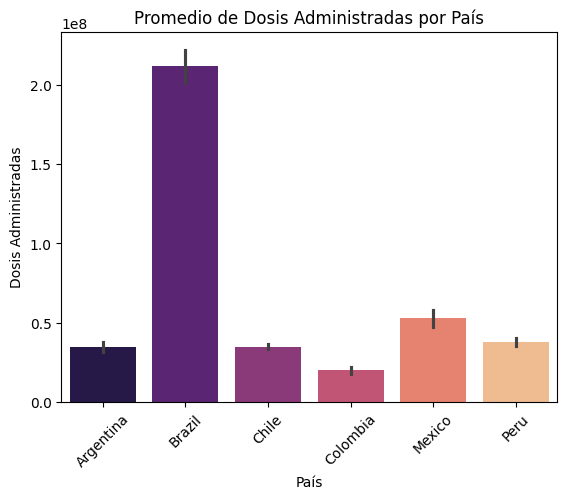

In [211]:
# Casos confirmados promedio por país
sns.barplot(x='country_name', y='new_confirmed', data=df_filtrado, palette='viridis')
plt.title("Promedio de Casos Confirmados por País")
plt.xlabel("País")
plt.ylabel("Casos Confirmados")
plt.xticks(rotation=45)
plt.show()

# Dosis administradas promedio por país
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df_filtrado, palette='magma')
plt.title("Promedio de Dosis Administradas por País")
plt.xlabel("País")
plt.ylabel("Dosis Administradas")
plt.xticks(rotation=45)
plt.show()


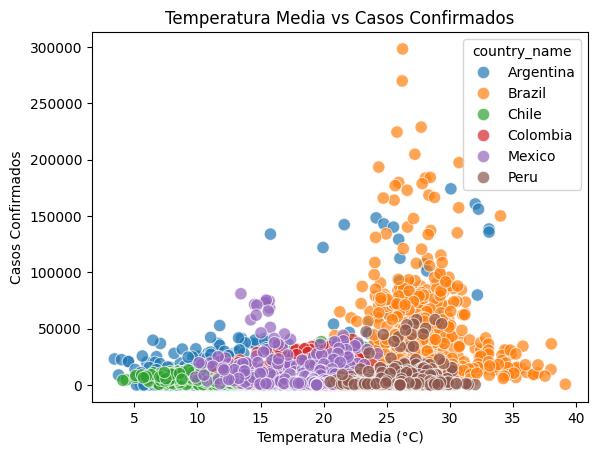

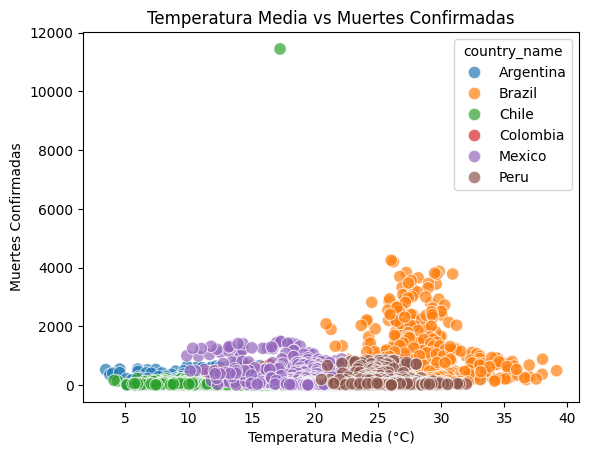

In [219]:
# Temperatura media vs Casos confirmados
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', hue='country_name', data=df_filtrado, palette='tab10', s=80, alpha=0.7)
plt.title("Temperatura Media vs Casos Confirmados")
plt.xlabel("Temperatura Media (°C)")
plt.ylabel("Casos Confirmados")
plt.show()

# Temperatura media vs Muertes confirmadas
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', hue='country_name', data=df_filtrado, palette='tab10', s=80, alpha=0.7)
plt.title("Temperatura Media vs Muertes Confirmadas")
plt.xlabel("Temperatura Media (°C)")
plt.ylabel("Muertes Confirmadas")
plt.show()


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\512077168.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datos_pais = df_filtrado[df_filtrado['country_name'] == pais].resample('M'). mean (numeric_only=True)
C:\Users\drael\AppData\Local\Temp\ipykernel_114368\512077168.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datos_pais = df_filtrado[df_filtrado['country_name'] == pais].resample('M'). mean (numeric_only=True)
C:\Users\drael\AppData\Local\Temp\ipykernel_114368\512077168.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datos_pais = df_filtrado[df_filtrado['country_name'] == pais].resample('M'). mean (numeric_only=True)
C:\Users\drael\AppData\Local\Temp\ipykernel_114368\512077168.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datos_pais = df_fi

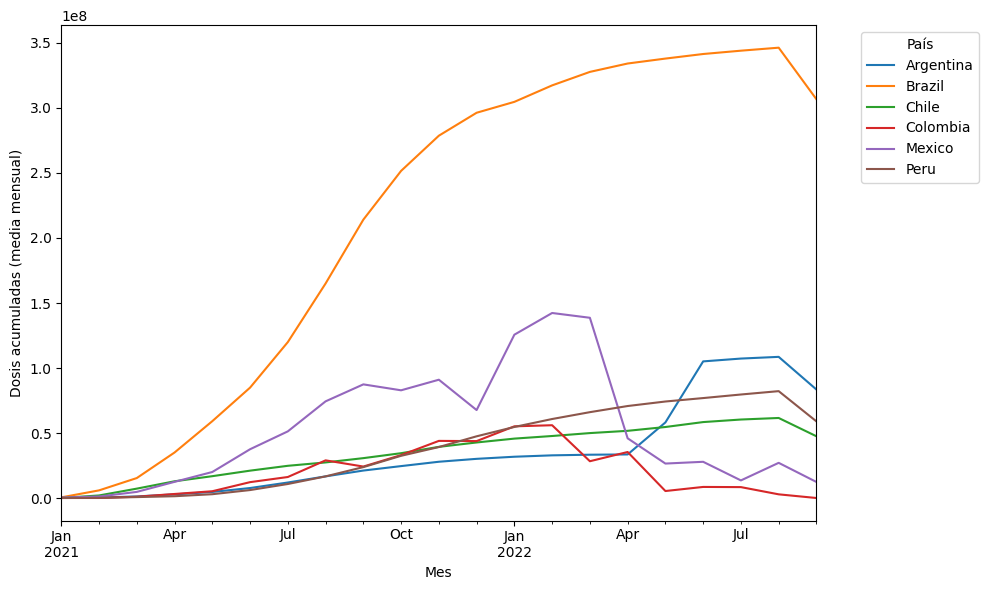

In [225]:
# Asegurarse de que la columna "date" sea el índice y de tipe datetime
if df_filtrado.index.name != 'date' :
    df_filtrado['date'] - pd. to_datetime(df_filtrado['date' ])
    df_filtrado.set_index('date', inplace=True)

# Obtener la lista de países únicos en el DataFrame
paises_seleccionados = df_filtrado['country_name'].unique()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada país y graficar la media mensual de dosis acumuladas 
for pais in paises_seleccionados:
    # Filtrar datos por país y hacer resample mensual (fin de mes)
    datos_pais = df_filtrado[df_filtrado['country_name'] == pais].resample('M'). mean (numeric_only=True)
    # Graficar la serie temporal de dosis acumuladas
    datos_pais['cumulative_vaccine_doses_administered'].plot(ax=ax, label=pais)

# Configarar el título y las etiquetas plt. title('Evolución de dosis acumuladas administradas por mes y país')
plt.xlabel('Mes')
plt.ylabel('Dosis acumuladas (media mensual)')
plt. legend (bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.tight_layout()
plt. show()


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\3946322455.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender = df_filtrado.groupby('country_name')[['adult_male_mortality_rate','adult_female_mortality_rate']].sum()


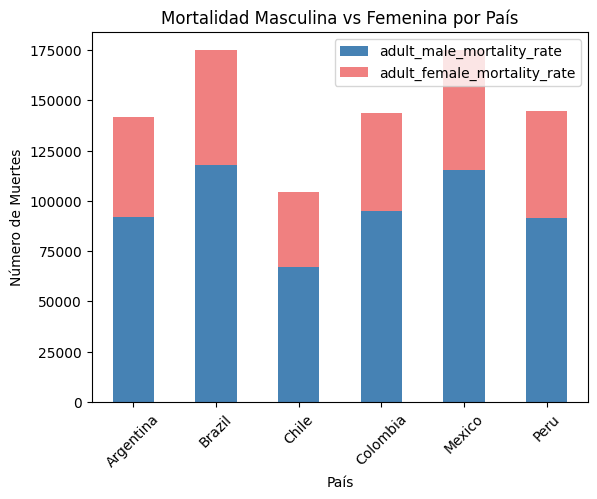

In [227]:
# Apilado de mortalidad masculina vs femenina
df_gender = df_filtrado.groupby('country_name')[['adult_male_mortality_rate','adult_female_mortality_rate']].sum()
df_gender.plot(kind='bar', stacked=True, color=['steelblue','lightcoral'])
plt.title("Mortalidad Masculina vs Femenina por País")
plt.xlabel("País")
plt.ylabel("Número de Muertes")
plt.xticks(rotation=45)
plt.show()


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\3255538735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metrics = df_filtrado.groupby('country_name')[['new_confirmed','new_deceased',]].sum()


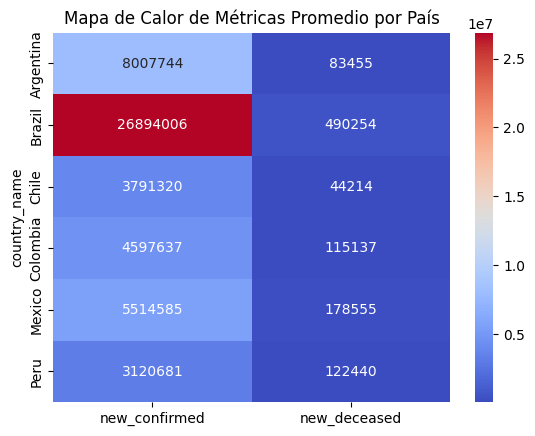

In [232]:
metrics = df_filtrado.groupby('country_name')[['new_confirmed','new_deceased',]].sum()
sns.heatmap(metrics, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Mapa de Calor de Métricas Promedio por País")
plt.show()




AVANCE 3


In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:


# --- Estilo  ---
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False
})
sns.set_theme(style="whitegrid", palette="deep")
PALETA = sns.color_palette("deep")

def ensure_dt_index(df_filtrado, date_col="date"):
    """Devuelve una vista con índice datetime ordenado a partir de df_filtrado."""
    out = df_filtrado.copy()
    if isinstance(out.index, pd.DatetimeIndex):
        return out.sort_index()
    if date_col in out.columns:
        out[date_col] = pd.to_datetime(out[date_col], errors="coerce")
        return out.set_index(date_col).sort_index()
    raise KeyError("No encuentro índice datetime ni columna de fecha.")

def series_by_country(dfi, country, column, freq="W", how="sum"):
    """
    Serie temporal por país y columna, remuestreada.
    how: 'sum' (flujos), 'mean' (continuas), 'last' (acumulados/estado)
    """
    s = dfi.loc[dfi["country_name"]==country, column].dropna()
    if s.empty:
        return s
    if how == "sum":
        return s.resample(freq).sum()
    elif how == "mean":
        return s.resample(freq).mean()
    elif how == "last":
        return s.resample(freq).last()
    else:
        raise ValueError("how debe ser 'sum', 'mean' o 'last'")

def add_trendline(ax, x, y, order=1):
    xnum = pd.Series(x).astype(float)
    ynum = pd.Series(y).astype(float)
    ok = xnum.notna() & ynum.notna()
    if ok.sum() < 3:
        return
    z = np.polyfit(xnum[ok], ynum[ok], order)
    p = np.poly1d(z)
    xs = np.linspace(xnum[ok].min(), xnum[ok].max(), 100)
    ax.plot(xs, p(xs), linestyle="--", linewidth=1.8, color="gray")

# --- Preparación de métricas derivadas ---
dfi = ensure_dt_index(df_filtrado, "date")

# asegurar tipos numéricos
numeric_cols = [
    "new_confirmed","new_deceased","new_recovered",
    "cumulative_confirmed","cumulative_deceased","cumulative_recovered",
    "cumulative_vaccine_doses_administered","population",
    "nurses_per_1000","physicians_per_1000",
    "population_urban","population_rural",
    "population_age_00_09","population_age_10_19","population_age_20_29",
    "population_age_30_39","population_age_40_49","population_age_50_59",
    "population_age_60_69","population_age_70_79","population_age_80_and_older"
]
for c in [c for c in numeric_cols if c in dfi.columns]:
    dfi[c] = pd.to_numeric(dfi[c], errors="coerce")

# casos activos 
if "active_cases" not in dfi.columns:
    dfi["active_cases"] = (
        dfi["cumulative_confirmed"].fillna(0)
        - dfi["cumulative_recovered"].fillna(0)
        - dfi["cumulative_deceased"].fillna(0)
    ).clip(lower=0)

# incidencias y vacunación
dfi["new_confirmed_per_100k"] = dfi["new_confirmed"] / dfi["population"] * 1e5
dfi["new_deceased_per_100k"]  = dfi["new_deceased"]  / dfi["population"] * 1e5
dfi["doses_per_1000"]         = dfi["cumulative_vaccine_doses_administered"] / dfi["population"] * 1000
dfi["vaccine_coverage_pct"]   = dfi["doses_per_1000"] / 10.0  # % aprox. (dosis/persona * 100)

# lista de países  
PAISES = sorted(dfi["country_name"].unique().tolist())
print("Países detectados:", PAISES)


Países detectados: ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\1739904262.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = (sub.groupby("country_name")[["physicians_per_1000","nurses_per_1000"]]


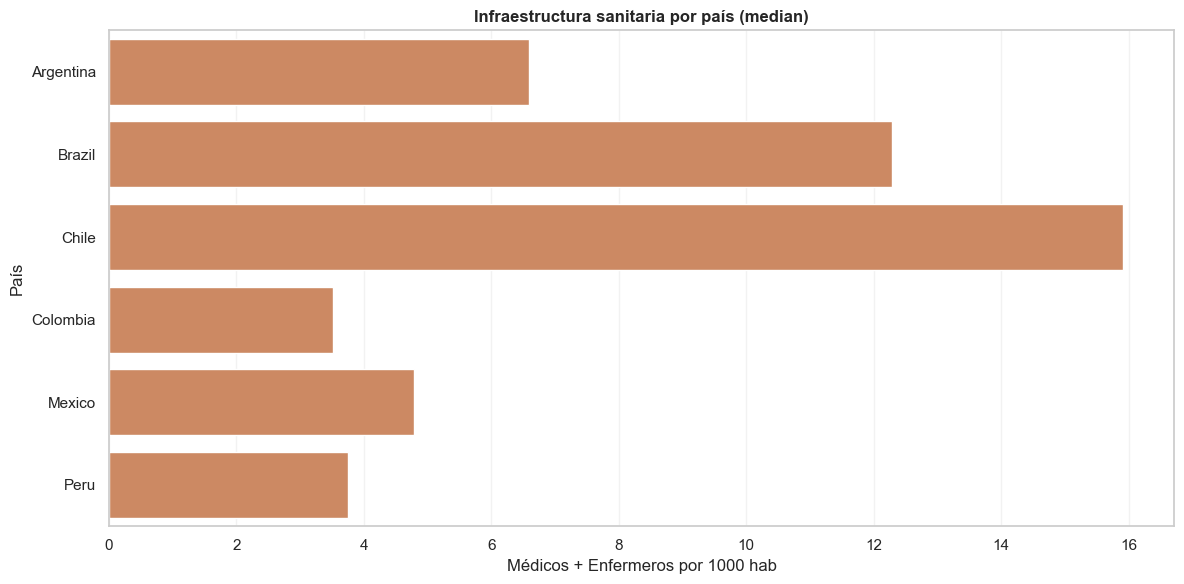

In [299]:
def grafico_infraestructura(dfi, how="median"):
    sub = dfi.copy()
    # en el dataset ya están "por 1000" (nurses_per_1000, physicians_per_1000)
    if how == "last":
        tmp = (sub.sort_index()
                 .groupby("country_name")
                 .tail(1)[["country_name","physicians_per_1000","nurses_per_1000"]])
        tmp = tmp.set_index("country_name")
    else:  # robusto a ruido
        tmp = (sub.groupby("country_name")[["physicians_per_1000","nurses_per_1000"]]
                     .median(numeric_only=True))

    tmp = tmp.fillna(0.0).reset_index()
    tmp["infra_per_1000"] = tmp["physicians_per_1000"] + tmp["nurses_per_1000"]
    tmp = tmp.sort_values("infra_per_1000", ascending=True)

    plt.figure()
    sns.barplot(data=tmp, x="infra_per_1000", y="country_name", color=PALETA[1])
    plt.xlabel("Médicos + Enfermeros por 1000 hab")
    plt.ylabel("País")
    plt.title(f"Infraestructura sanitaria por país ({how})")
    plt.tight_layout()
    plt.show()

grafico_infraestructura(dfi, how="median")


C:\Users\drael\AppData\Local\Temp\ipykernel_114368\1277480275.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ages = (dfi.groupby("country_name")[age_cols]


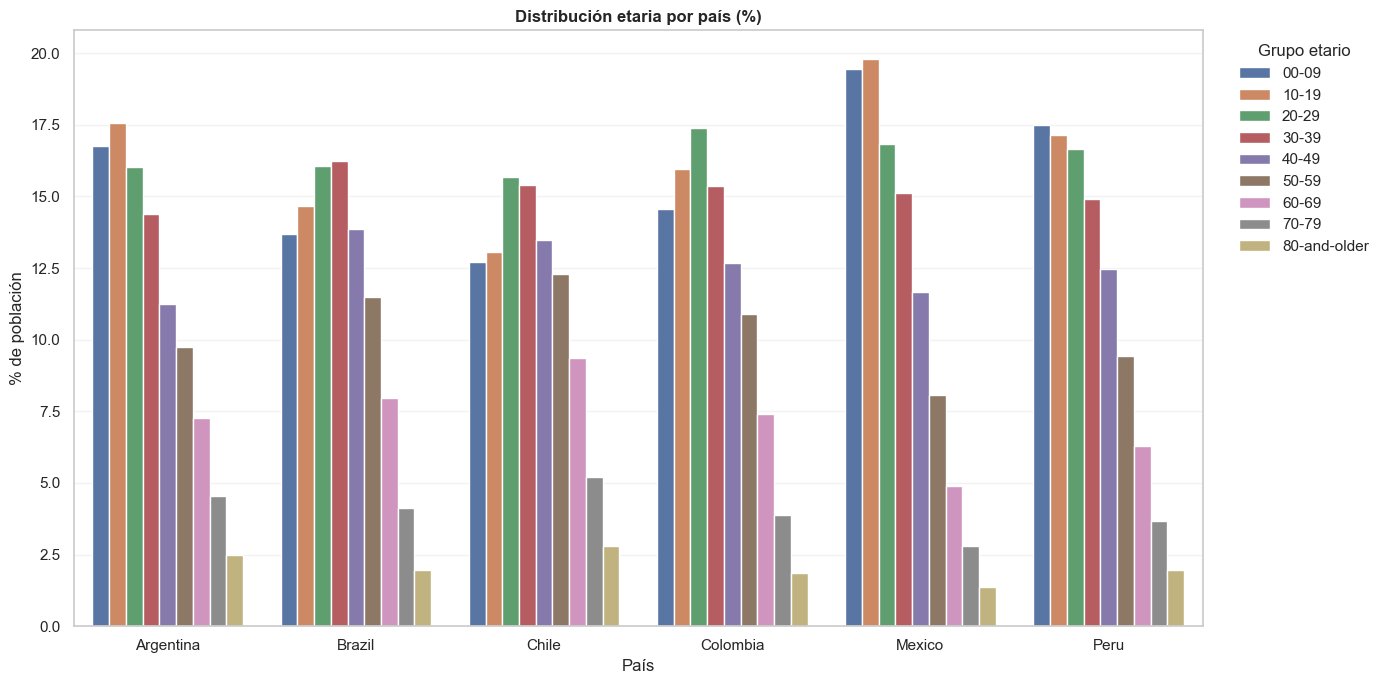

In [302]:
def grafico_distribucion_etaria(dfi):
    age_cols = [c for c in dfi.columns if c.startswith("population_age_")]
    if not age_cols:
        raise ValueError("No encuentro columnas de edad (population_age_...).")

    # usamos la mediana por país (estable)
    ages = (dfi.groupby("country_name")[age_cols]
              .median(numeric_only=True)
              .reset_index())
    # normalizamos a porcentaje dentro de cada país
    age_tot = ages[age_cols].sum(axis=1)
    ages_pct = ages.copy()
    for c in age_cols:
        ages_pct[c] = ages[c] / age_tot * 100

    ages_melt = ages_pct.melt(id_vars="country_name", var_name="age_group", value_name="pct")
    ages_melt["age_group"] = ages_melt["age_group"].str.replace("population_age_","").str.replace("_","-")

    plt.figure(figsize=(14, 7))
    sns.barplot(data=ages_melt, x="country_name", y="pct", hue="age_group")
    plt.ylabel("% de población")
    plt.xlabel("País")
    plt.title("Distribución etaria por país (%)")
    plt.legend(title="Grupo etario", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

grafico_distribucion_etaria(dfi)


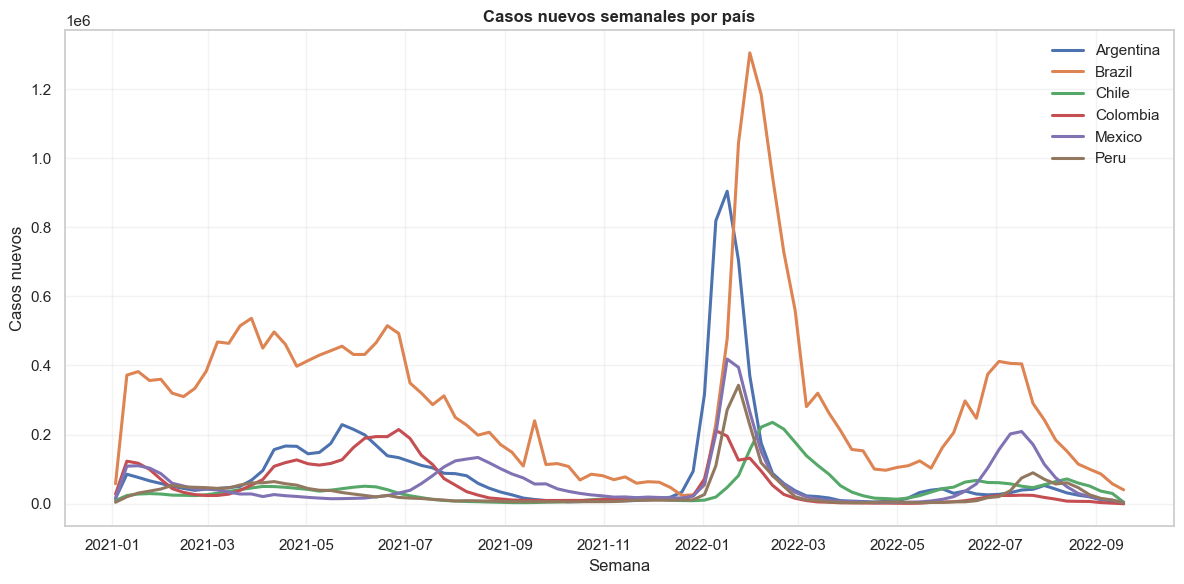

In [304]:
def grafico_casos_semanales(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        s = series_by_country(dfi, p, "new_confirmed", freq="W", how="sum")
        if not s.empty:
            sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    plt.title("Casos nuevos semanales por país")
    plt.xlabel("Semana")
    plt.ylabel("Casos nuevos")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_casos_semanales(dfi, PAISES)


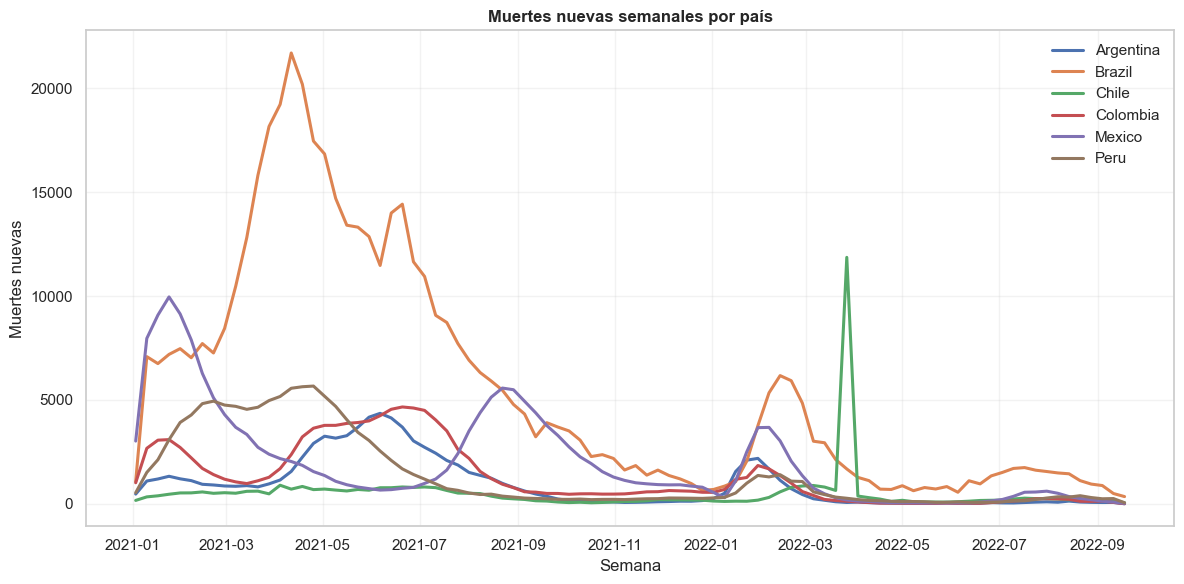

In [305]:
def grafico_muertes_semanales(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        s = series_by_country(dfi, p, "new_deceased", freq="W", how="sum")
        if not s.empty:
            sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    plt.title("Muertes nuevas semanales por país")
    plt.xlabel("Semana")
    plt.ylabel("Muertes nuevas")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_muertes_semanales(dfi, PAISES)


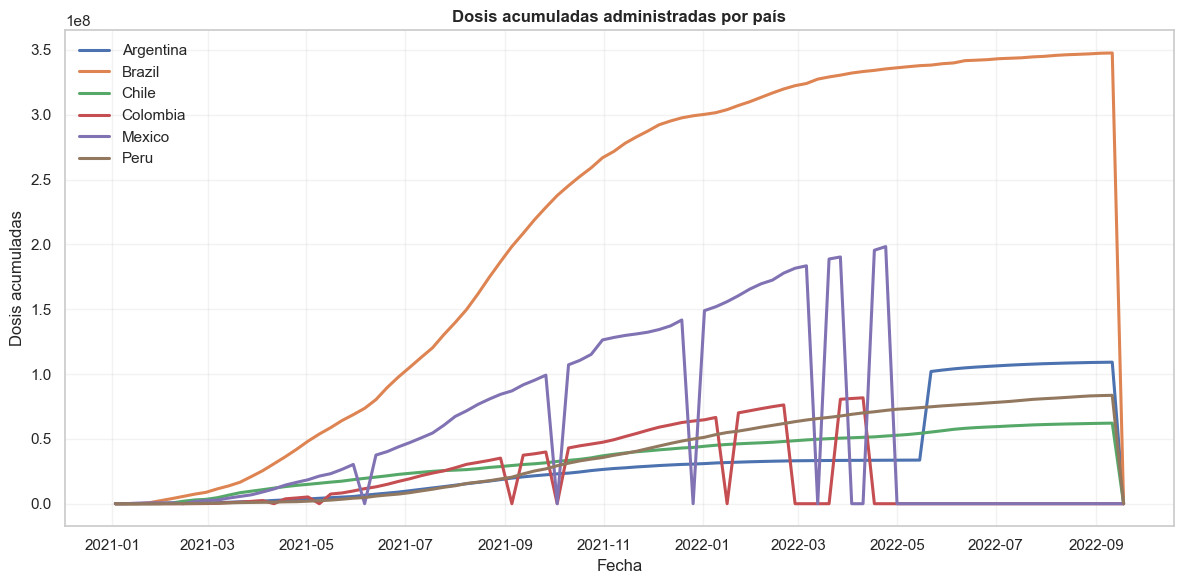

In [306]:
def grafico_total_dosis(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        s = series_by_country(dfi, p, "cumulative_vaccine_doses_administered", freq="W", how="last")
        if not s.empty:
            sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    plt.title("Dosis acumuladas administradas por país")
    plt.xlabel("Fecha")
    plt.ylabel("Dosis acumuladas")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_total_dosis(dfi, PAISES)


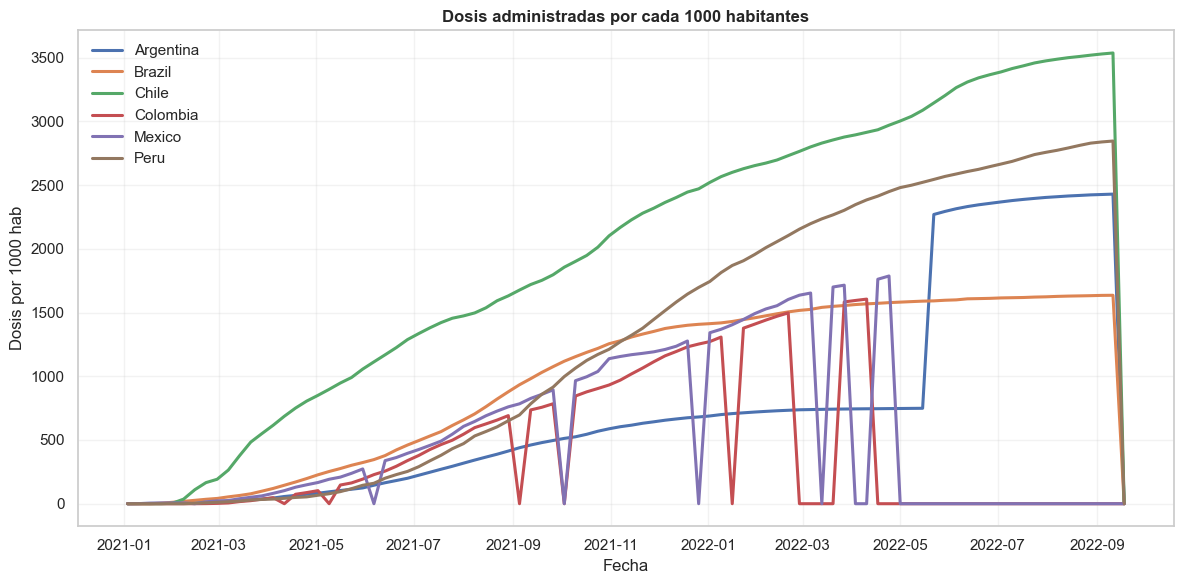

In [307]:
def grafico_dosis_por1000(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        s = series_by_country(dfi, p, "doses_per_1000", freq="W", how="last")
        if not s.empty:
            sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    plt.title("Dosis administradas por cada 1000 habitantes")
    plt.xlabel("Fecha")
    plt.ylabel("Dosis por 1000 hab")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_dosis_por1000(dfi, PAISES)


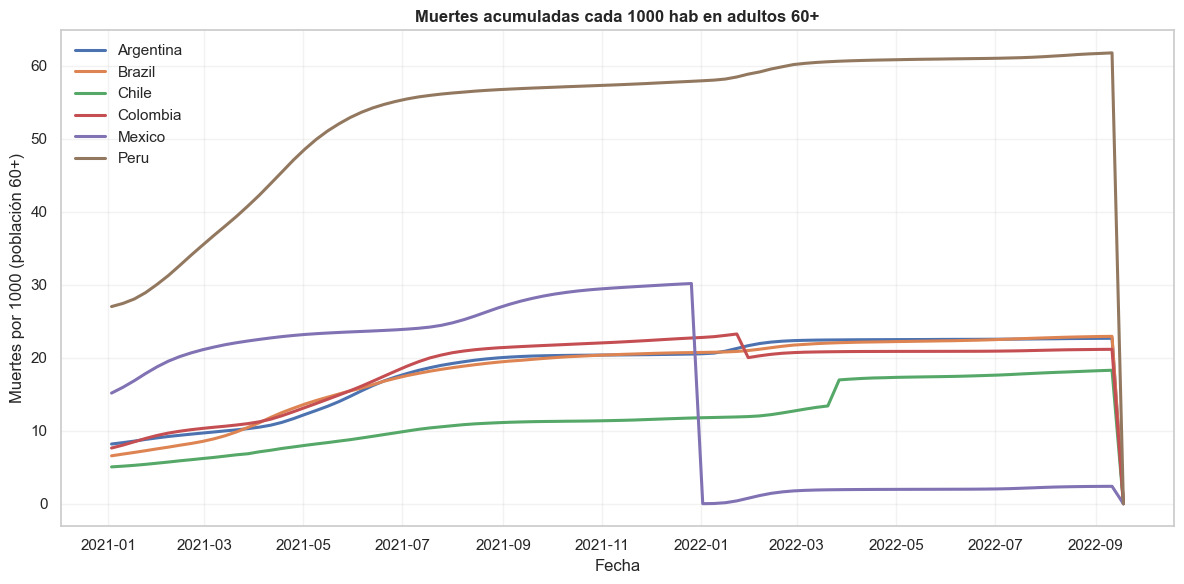

In [308]:
def grafico_muertes_adultos(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        sub = dfi[dfi["country_name"]==p].copy()
        if {"population_age_60_69","population_age_70_79","population_age_80_and_older"}.issubset(sub.columns):
            sub["pop_60plus"] = (sub["population_age_60_69"] + 
                                 sub["population_age_70_79"] + 
                                 sub["population_age_80_and_older"])
            sub["deaths_per_1000_60plus"] = (sub["cumulative_deceased"] / sub["pop_60plus"]) * 1000
            s = sub["deaths_per_1000_60plus"].resample("W").last()
            sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    plt.title("Muertes acumuladas cada 1000 hab en adultos 60+")
    plt.xlabel("Fecha")
    plt.ylabel("Muertes por 1000 (población 60+)")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_muertes_adultos(dfi, PAISES)


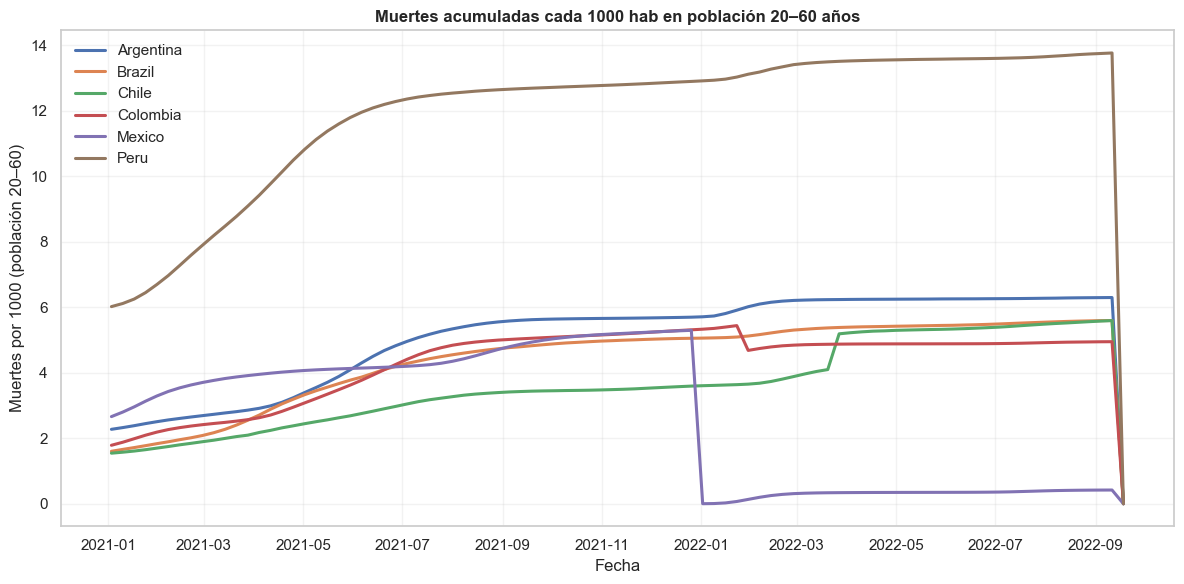

In [309]:
def grafico_muertes_20a60(dfi, paises=PAISES):
    plt.figure()
    for p in paises:
        sub = dfi[dfi["country_name"]==p].copy()
        if {"population_age_20_29","population_age_30_39",
            "population_age_40_49","population_age_50_59"}.issubset(sub.columns):
            
            # población total entre 20 y 60
            sub["pop_20_60"] = (sub["population_age_20_29"] + 
                                sub["population_age_30_39"] + 
                                sub["population_age_40_49"] + 
                                sub["population_age_50_59"])
            
            # muertes acumuladas por cada 1000 hab en este grupo
            sub["deaths_per_1000_20_60"] = (sub["cumulative_deceased"] / sub["pop_20_60"]) * 1000
            
            # tomar como serie semanal
            s = sub["deaths_per_1000_20_60"].resample("W").last()
            if not s.empty:
                sns.lineplot(x=s.index, y=s.values, label=p, linewidth=2.2)
    
    plt.title("Muertes acumuladas cada 1000 hab en población 20–60 años")
    plt.xlabel("Fecha")
    plt.ylabel("Muertes por 1000 (población 20–60)")
    plt.legend()
    plt.tight_layout()
    plt.show()

grafico_muertes_20a60(dfi, PAISES)


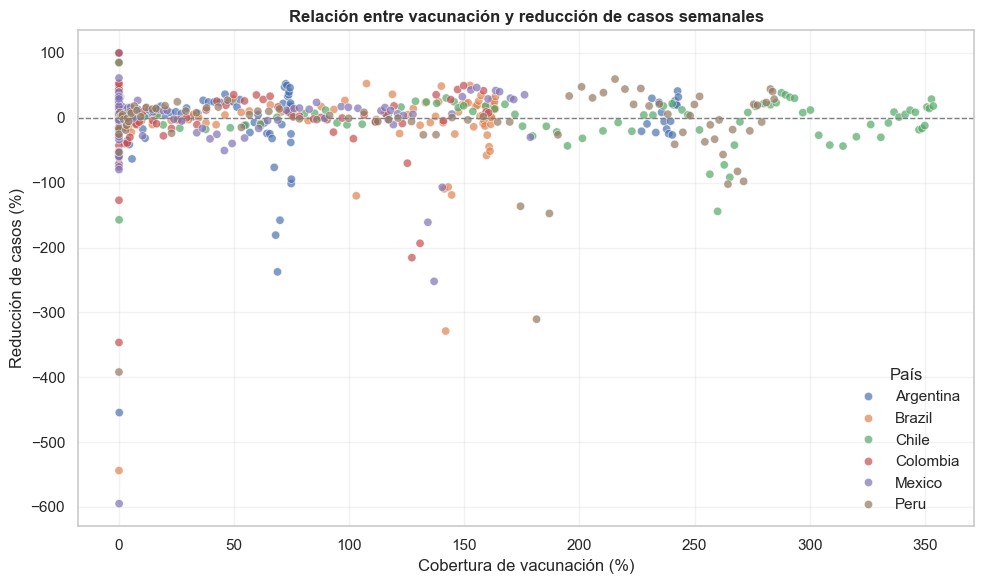

In [311]:
def grafico_vacunas_vs_reduccion(dfi, paises=PAISES):
    data = []
    for p in paises:
        sub = dfi[dfi["country_name"]==p].copy()

        # casos semanales
        casos = sub["new_confirmed"].resample("W").sum()
        reduccion = -casos.pct_change()*100  # reducción = caída de casos

        # vacunación semanal (último dato de la semana)
        vax = sub["cumulative_vaccine_doses_administered"].resample("W").last() / sub["population"].iloc[0] * 100

        df_tmp = pd.DataFrame({
            "country": p,
            "vax_rate_pct": vax,
            "reduccion_casos_pct": reduccion
        })
        data.append(df_tmp)

    df_plot = pd.concat(data).dropna()

    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df_plot, x="vax_rate_pct", y="reduccion_casos_pct", hue="country", alpha=0.7)

    plt.axhline(0, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("Cobertura de vacunación (%)")
    plt.ylabel("Reducción de casos (%)")
    plt.title("Relación entre vacunación y reducción de casos semanales")
    plt.legend(title="País")
    plt.tight_layout()
    plt.show()

grafico_vacunas_vs_reduccion(dfi, PAISES)



C:\Users\drael\AppData\Local\Temp\ipykernel_114368\2602886377.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("country_name")["new_confirmed"]


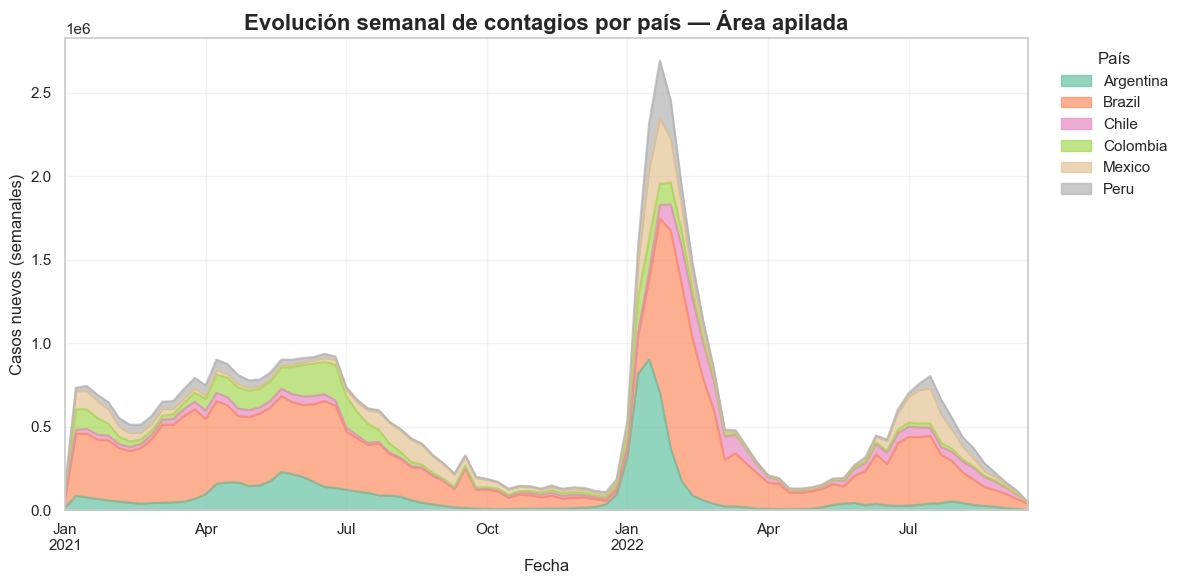

In [ ]:
def grafico_areas_apiladas_total_contagios(dfi, paises, freq="W", per_100k=False):
    """
    Área apilada con la evolución temporal de contagios (new_confirmed) para varios países a la vez.
    - freq: 'W' semanal (recomendado), 'M' mensual, etc.
    - per_100k: si True, normaliza cada país por su población (casos por 100k).
    """
    # asegurar índice datetime y filtrar países
    dfx = ensure_dt_index(dfi, "date")
    paises = [p for p in paises if p in dfx["country_name"].unique()]
    if not paises:
        raise ValueError("Ninguno de los países indicados está en el DataFrame.")

    # agregación por país y periodo (suma semanal de casos nuevos)
    tabla = (
        dfx[dfx["country_name"].isin(paises)]
        .groupby("country_name")["new_confirmed"]
        .resample(freq)
        .sum()
        .reset_index()
    )

    # pivot: columnas = países, filas = fechas
    area = (
        tabla.pivot(index="date", columns="country_name", values="new_confirmed")
             .sort_index()
             .fillna(0)
    )

    # normalización opcional por 100k
    if per_100k:
        # población "estable": tomo el máximo disponible por país
        pops = (dfx.groupby("country_name")["population"]
                  .max(numeric_only=True)
                  .reindex(area.columns))
        # evitar división por cero
        pops = pops.replace(0, np.nan)
        area = area.divide(pops, axis=1) * 1e5
        ylab = "Casos por 100.000 hab (semanales)"
        titulo = "Evolución semanal de contagios por país (por 100k) — Área apilada"
    else:
        ylab = "Casos nuevos (semanales)"
        titulo = "Evolución semanal de contagios por país — Área apilada"

    # plot del área apilada (todas las series en una figura)
    ax = area.plot.area(alpha=0.7, figsize=(12, 6), cmap="Set2")
    ax.set_title(titulo, fontsize=16, weight="bold")
    ax.set_xlabel("Fecha")
    ax.set_ylabel(ylab)
    # leyenda afuera para no tapar
    ax.legend(title="País", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


PAISES_6 = ["Argentina", "Brazil", "Chile", "Colombia", "Mexico", "Peru"]

# Total de contagios (valores absolutos)
grafico_areas_apiladas_total_contagios(dfi, PAISES_6, freq="W", per_100k=False)




C:\Users\drael\AppData\Local\Temp\ipykernel_114368\3257325861.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("country_name")[cols]


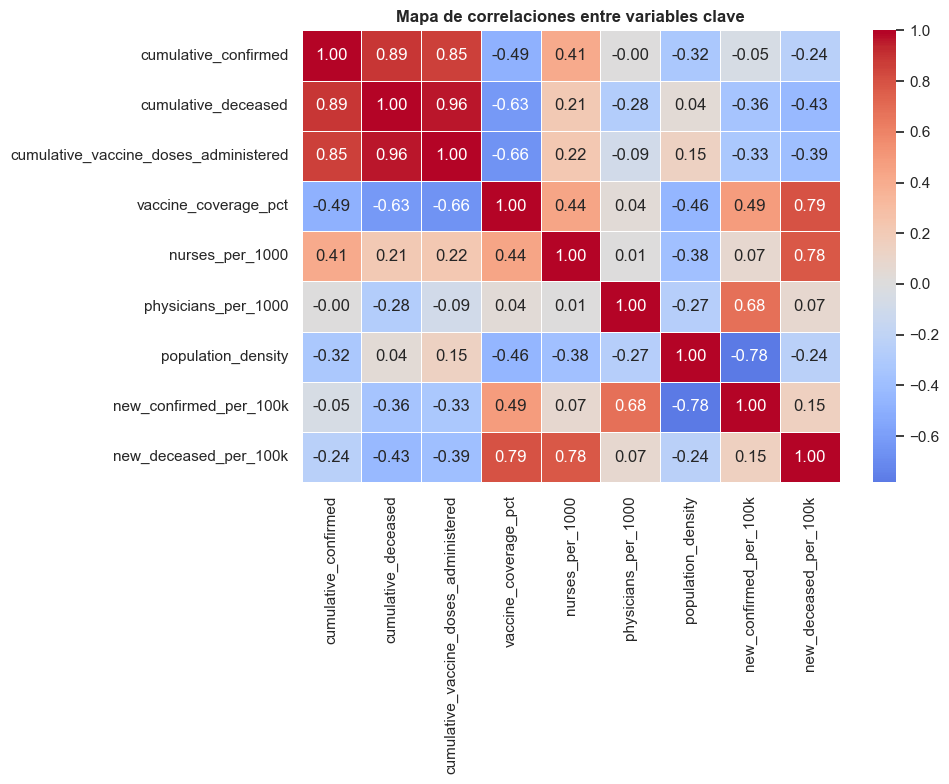

In [323]:
def grafico_mapa_correlaciones(dfi):
    # columnas clave
    cols = [
        "cumulative_confirmed",
        "cumulative_deceased",
        "cumulative_vaccine_doses_administered",
        "vaccine_coverage_pct",
        "nurses_per_1000",
        "physicians_per_1000",
        "population_density",
        "new_confirmed_per_100k",
        "new_deceased_per_100k"
    ]
    # filtrar columnas disponibles en el df
    cols = [c for c in cols if c in dfi.columns]

    # snapshot por país (última fecha disponible)
    snap = (
        dfi.sort_index()
           .groupby("country_name")[cols]
           .max(numeric_only=True)
    )

    # matriz de correlaciones
    corr = snap.corr()

    # mapa de calor
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
    plt.title("Mapa de correlaciones entre variables clave")
    plt.tight_layout()
    plt.show()

grafico_mapa_correlaciones(dfi)


In [325]:
def mediana(x):
    return np.nanmedian(x)

def varianza(x):
    return np.nanvar(x)

def rango(x):
    return np.nanmax(x) - np.nanmin(x)

def estadisticas_por_pais(dfi, columnas, paises=PAISES_6):
    resultados = []
    for p in paises:
        sub = dfi[dfi["country_name"] == p]
        for col in columnas:
            if col not in sub.columns:
                continue
            serie = pd.to_numeric(sub[col], errors="coerce").dropna()
            if serie.empty:
                continue
            resultados.append({
                "País": p,
                "Variable": col,
                "Mediana": mediana(serie),
                "Varianza": varianza(serie),
                "Rango": rango(serie)
            })
    return pd.DataFrame(resultados)

columnas_clave = ["new_confirmed","new_deceased",
                  "cumulative_vaccine_doses_administered",
                  "physicians_per_1000","nurses_per_1000"]

df_stats = estadisticas_por_pais(dfi, columnas_clave, paises=["Argentina","Brazil","Chile","Colombia","Mexico","Peru"])
df_stats


,País,Variable,Mediana,Varianza,Rango
0,Argentina,new_confirmed,5104,552836592,174174
1,Argentina,new_deceased,58,27586,656
2,Argentina,cumulative_vaccine_doses_administered,27042989,1330947871506109,109204825
3,Argentina,physicians_per_1000,4,0,0
4,Argentina,nurses_per_1000,3,0,0
5,Brazil,new_confirmed,32321,1565019293,298408
6,Brazil,new_deceased,389,754387,4249
7,Brazil,cumulative_vaccine_doses_administered,271754599,16942809913727052,347868481
8,Brazil,physicians_per_1000,2,0,0
9,Brazil,nurses_per_1000,10,0,0
